# Amazon Hiring Challenge
##### By Ayan Dogra

## INDEX
### [1. DATA EXPLORATION AND ANALYSIS](#dataanalysis)
### [2. FEATURE ENGINEERING](#featureengineering)
### [3. MODEL BUILDING AND EVALUATION](#modelling)

# 1. DATA EXPLORATION AND ANALYSIS<A id='dataanalysis'></A>

### Starting with importing all the necessary libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns',None)

from sklearn.preprocessing import OrdinalEncoder
from category_encoders import LeaveOneOutEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

#For Regression Task
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For Classification Task
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE
strategy={0:1093,1:2335,2:1823,3:2001,4:822,5:196,6:407,7:461,8:230,9:2335}
smote=SMOTE(sampling_strategy=strategy)
from sklearn.metrics import classification_report,precision_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

### Importing the Dataset for this problem 

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
# sub=pd.read_csv('sample_submission.csv')

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='FitmentPercent'>

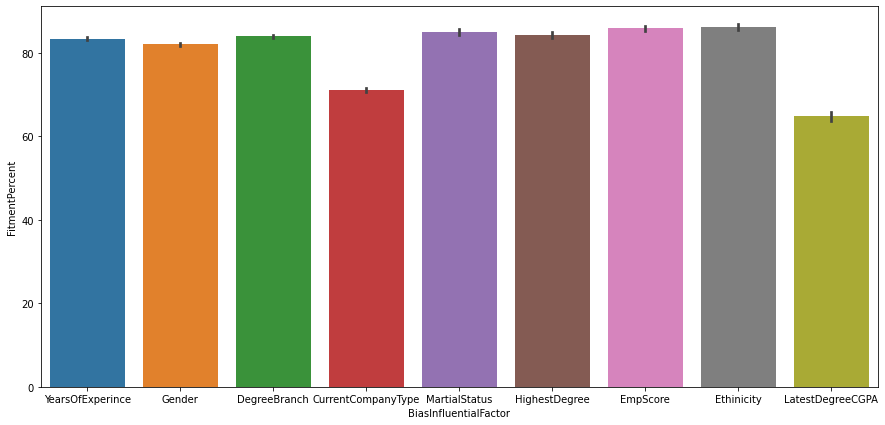

In [3]:
plt.figure(figsize=(15,7))
sns.barplot(x=train['BiasInfluentialFactor'],y=train['FitmentPercent'])

In [4]:
train.head(10)

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34
5,9670,Frank,Native,35,Male,JR88879,BCA,Computer Science,Tier 2,9,...,25,29,Married,4,DS,MidSized,Engineering,10,YearsOfExperince,93.23
6,16554,Joseph,Hindi,31,Male,JR85289,PhD,Computer Science,Tier 1,7,...,12,21,Single,3,SDE,Enterprise,Customer Success,8,CurrentCompanyType,62.29
7,3301,Thomas,English,32,Male,JR85289,B.Tech,Information Technology,Tier 2,8,...,7,17,Married,3,SSE,MidSized,Engineering,18,DegreeBranch,93.71
8,12236,Henry,English,28,Female,JR87525,M.Tech,Electrical,Tier 1,6,...,21,28,Married,4,SDE,Startup,Engineering,7,Gender,91.66
9,10157,Robert,Native,31,Female,JR88873,B.Tech,Artificial Intelligence,Tier 2,8,...,21,31,Married,3,SDE,Startup,Customer Success,10,Gender,73.31


### Creating a Data Frame which will be later used to store the Test predictions

In [5]:
sub=pd.DataFrame()
sub['EmpID']=test['EmpID']

### Starting with some basic visualizations for the Train Data 

<AxesSubplot:>

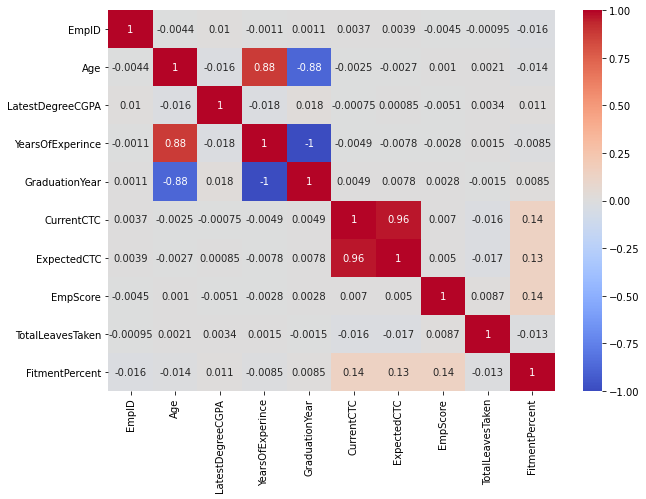

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

### Here Some features seem to be highly correlated with each other 
### These are:- 
### `Age-YearsOfExperience` ,`Age-GraduationYear` ,`GraduationYear-YearsOfExperience` ,`ExpectedCTC-CurrentCTC`
### These are handled [here](#correlation)

## Basic Visualizations of Data

In [7]:
print(f'Lenght of Train set is {len(train)} and Length of Test set is {len(test)}')

Lenght of Train set is 13645 and Length of Test set is 8745


In [8]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

### Checking the Dataset for Null values

In [10]:
train.isnull().sum()/len(train)*100

EmpID                       0.000000
EmpName                     0.000000
LanguageOfCommunication     0.000000
Age                         0.000000
Gender                      0.000000
JobProfileIDApplyingFor     0.000000
HighestDegree               0.000000
DegreeBranch                0.000000
GraduatingInstitute         0.000000
LatestDegreeCGPA            0.000000
YearsOfExperince            0.000000
GraduationYear              0.000000
CurrentCTC                  0.000000
ExpectedCTC                 0.000000
MartialStatus               0.000000
EmpScore                    0.000000
CurrentDesignation          0.000000
CurrentCompanyType          0.000000
DepartmentInCompany         0.000000
TotalLeavesTaken            0.000000
BiasInfluentialFactor      24.448516
FitmentPercent              0.000000
dtype: float64

In [11]:
test.isnull().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
dtype: int64

### There looks to be Null values in only 1 train column, these values will be altered [later](#null)

<AxesSubplot:xlabel='FitmentPercent', ylabel='Density'>

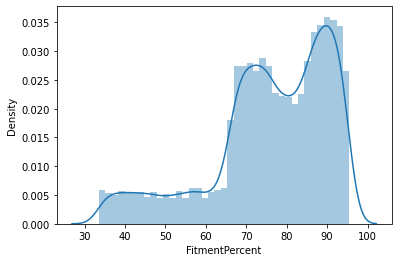

In [12]:
sns.distplot(train['FitmentPercent'])

<AxesSubplot:xlabel='FitmentPercent'>

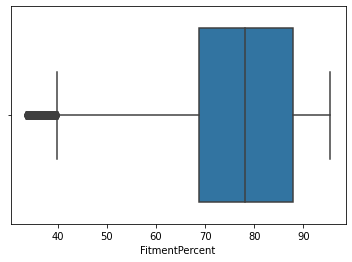

In [13]:
sns.boxplot(train['FitmentPercent'])

<AxesSubplot:xlabel='Age'>

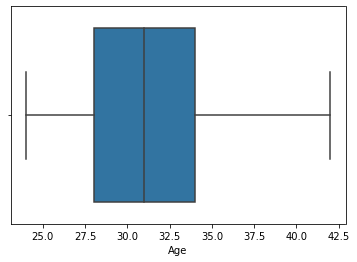

In [14]:
sns.boxplot(train['Age'])

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='FitmentPercent'>

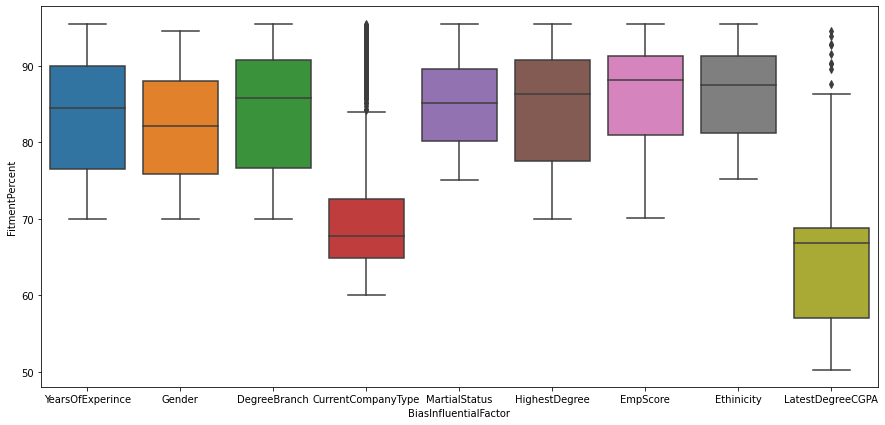

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(x=train['BiasInfluentialFactor'],y=train['FitmentPercent'])

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='Age'>

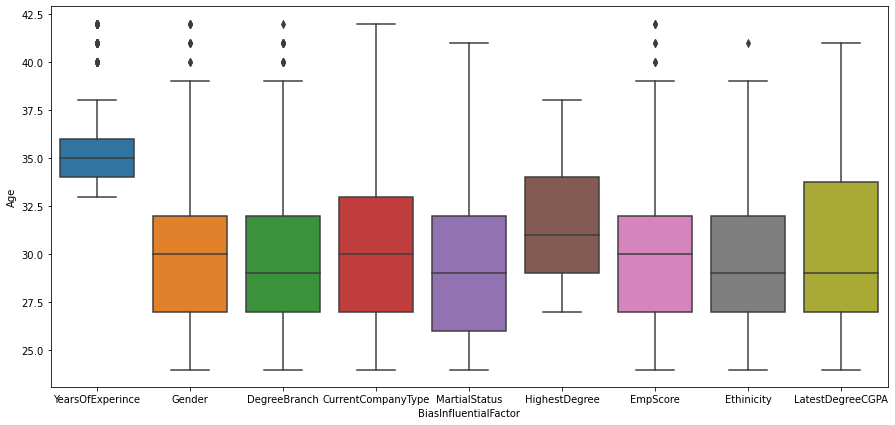

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(x=train['BiasInfluentialFactor'],y=train['Age'])

<AxesSubplot:xlabel='TotalLeavesTaken', ylabel='FitmentPercent'>

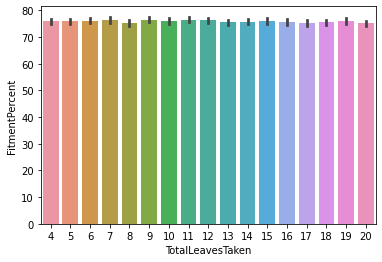

In [17]:
sns.barplot(x=train['TotalLeavesTaken'],y=train['FitmentPercent'])

In [18]:
train['BiasInfluentialFactor'].value_counts()

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

# 2. FEATURE ENGINEERING<a id='featureengineering'></a>

### Before going forward we are going to handle the null values of Data, by filling the them with UNK as we are not aware of the values in **BiasInfluentialFactore** which are missing<a id='null'></a>

In [19]:
train['BiasInfluentialFactor'].fillna('UNK',inplace=True)

### Here we are forming a new column called RiseInCTC <a id='correlation'></a>
### This is implemented to preserve information from ExpectedCTC before dropping it
### Columns are also divided into **Numerical** and **Categorical** columns

In [20]:
train['RiseInCTC']=train['ExpectedCTC']-train['CurrentCTC']
test['RiseInCTC']=test['ExpectedCTC']-test['CurrentCTC']

numerical_cols=[x for x in train.columns if train[x].dtypes!='object' and x not in ['FitmentPercent','EmpID'
                                                                                    ,'Age','ExpectedCTC',
                                                                                    'GraduationYear']]
categorical_cols=[x for x in train.columns if train[x].dtypes=='object' and x not in ['BiasInfluentialFactor']]

### Checking for unique values in Train and Test set

In [21]:
set_columns=numerical_cols+categorical_cols

for x in set_columns:
    print(f'Unique Values in {x} are : {train[x].nunique()}')

Unique Values in LatestDegreeCGPA are : 7
Unique Values in YearsOfExperince are : 12
Unique Values in CurrentCTC are : 25
Unique Values in EmpScore are : 5
Unique Values in TotalLeavesTaken are : 17
Unique Values in RiseInCTC are : 7
Unique Values in EmpName are : 1766
Unique Values in LanguageOfCommunication are : 3
Unique Values in Gender are : 3
Unique Values in JobProfileIDApplyingFor are : 9
Unique Values in HighestDegree are : 8
Unique Values in DegreeBranch are : 6
Unique Values in GraduatingInstitute are : 3
Unique Values in MartialStatus are : 2
Unique Values in CurrentDesignation are : 8
Unique Values in CurrentCompanyType are : 3
Unique Values in DepartmentInCompany are : 5


### Checking for new values in Test set which absent in Train set

In [22]:
for x in set_columns:
    print(f'Columns: {x} having different values in test are {len(set(test[x].unique())-set(train[x].unique()))}')

Columns: LatestDegreeCGPA having different values in test are 0
Columns: YearsOfExperince having different values in test are 0
Columns: CurrentCTC having different values in test are 0
Columns: EmpScore having different values in test are 0
Columns: TotalLeavesTaken having different values in test are 0
Columns: RiseInCTC having different values in test are 0
Columns: EmpName having different values in test are 196
Columns: LanguageOfCommunication having different values in test are 0
Columns: Gender having different values in test are 0
Columns: JobProfileIDApplyingFor having different values in test are 0
Columns: HighestDegree having different values in test are 0
Columns: DegreeBranch having different values in test are 0
Columns: GraduatingInstitute having different values in test are 0
Columns: MartialStatus having different values in test are 0
Columns: CurrentDesignation having different values in test are 0
Columns: CurrentCompanyType having different values in test are 0
Col

### It can be observed that only EmpName has new values in Testset, it is handled [below](#empname)

## Dropping, Label and OneHot Encoding<a id='empname'></a>
### EmpID,EmpName are dropped since there are not contributing to the model building 

In [23]:
drop_columns=['EmpID','EmpName','GraduationYear','ExpectedCTC','TotalLeavesTaken','Age']
dummie_columns=[ 'Gender','MartialStatus','JobProfileIDApplyingFor',
                'LanguageOfCommunication','DegreeBranch','EmpScore']
ordinal_columns=['DepartmentInCompany','LatestDegreeCGPA','YearsOfExperince','GraduatingInstitute',
                 'CurrentCompanyType','HighestDegree','CurrentDesignation']

In [24]:
train.drop(columns=drop_columns,inplace=True)
test.drop(columns=drop_columns,inplace=True)

numerical_cols=[x for x in train.columns if train[x].dtypes!='object' and x not in ['FitmentPercent','EmpID'
                                                                                    ,'Age','ExpectedCTC',
                                                                                    'GraduationYear']]
categorical_cols=[x for x in train.columns if train[x].dtypes=='object' and x not in ['BiasInfluentialFactor']]

In [25]:
oe = OrdinalEncoder()
train[ordinal_columns]=oe.fit_transform(train[ordinal_columns])
test[ordinal_columns]=oe.transform(test[ordinal_columns])

train=pd.get_dummies(train,columns=dummie_columns,drop_first=True)
test=pd.get_dummies(test,columns=dummie_columns,drop_first=True)

### Checking Correlation Matrix once again 

<AxesSubplot:>

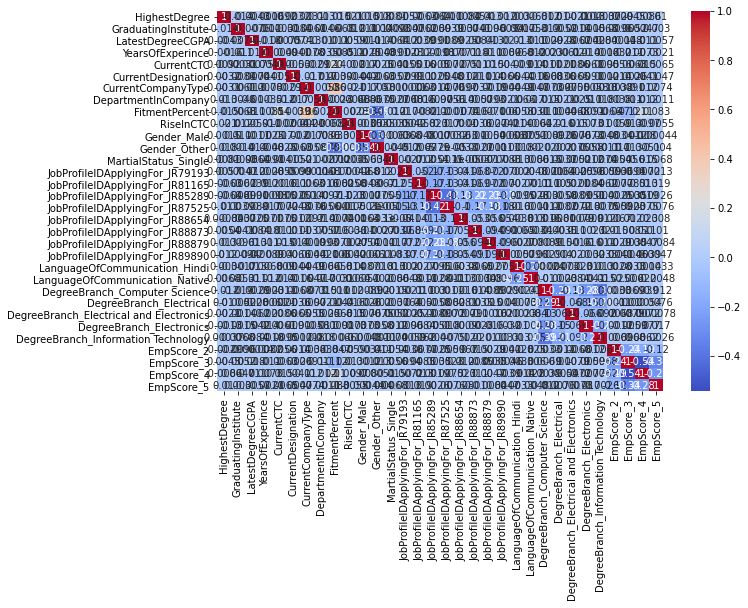

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

#### It is fine now, with everything relatively less correlated

## Converting BiasInfluentialFactor into Labels.
### These will be used later for Multiclass-Classification

In [27]:
labels=train['BiasInfluentialFactor'].unique()
i=0
idx2class={}
class2idx={}
for tp in labels:
    idx2class[i]=tp
    class2idx[tp]=i
    i+=1
    
idx2class

{0: 'YearsOfExperince',
 1: 'UNK',
 2: 'Gender',
 3: 'DegreeBranch',
 4: 'CurrentCompanyType',
 5: 'MartialStatus',
 6: 'HighestDegree',
 7: 'EmpScore',
 8: 'Ethinicity',
 9: 'LatestDegreeCGPA'}

In [28]:
train['BiasInfluentialFactor']=train['BiasInfluentialFactor'].map(class2idx)

### Using VIF Factor to analyze dependency of variables

In [29]:
X=train.drop(columns=['BiasInfluentialFactor','FitmentPercent'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                    feature        VIF
0                             HighestDegree   1.819495
1                       GraduatingInstitute   2.327955
2                          LatestDegreeCGPA   6.021153
3                          YearsOfExperince   3.537935
4                                CurrentCTC   6.917595
5                        CurrentDesignation   4.966161
6                        CurrentCompanyType   2.667493
7                       DepartmentInCompany   3.505036
8                                 RiseInCTC  11.766596
9                               Gender_Male   2.893547
10                             Gender_Other   1.212889
11                     MartialStatus_Single   1.385906
12          JobProfileIDApplyingFor_JR79193   2.471709
13          JobProfileIDApplyingFor_JR81165   2.504628
14          JobProfileIDApplyingFor_JR85289  11.136019
15          JobProfileIDApplyingFor_JR87525   8.415326
16          JobProfileIDApplyingFor_JR88654   1.923636
17        

### This looks good, moving on to Model building 

# 3. MODEL BUILDING AND EVALUATION<A id='modelling'></A>

## Starting with FitmentPercent Predictions

In [30]:
X=train.drop(columns=['FitmentPercent','BiasInfluentialFactor'])
y=train['FitmentPercent']
test_reg=test.copy()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
numerical_cols=[
 'CurrentCTC',
 'RiseInCTC']

In [33]:
sc=StandardScaler()
X_train[numerical_cols]=sc.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=sc.transform(X_test[numerical_cols])
test_reg[numerical_cols]=sc.transform(test_reg[numerical_cols])

## Running Cross Validations to find the best Model 

In [34]:
# cv_lr=cross_val_score(LinearRegression(),X=X,y=y,scoring='neg_root_mean_squared_error',cv=5)
# print(cv_lr.mean())
# print(cv_lr.var())

In [35]:
# cv_dt=cross_val_score(DecisionTreeRegressor(),X=X,y=y,scoring='neg_root_mean_squared_error',cv=5)
# print(cv_dt.mean())
# print(cv_dt.var())

In [36]:
# cv_lgb=cross_val_score(LGBMRegressor(),X=X,y=y,scoring='neg_root_mean_squared_error',cv=5)
# print(cv_lgb.mean())
# print(cv_lgb.var())

In [37]:
# cv_xgb=cross_val_score(XGBRegressor(),X=X,y=y,scoring='neg_root_mean_squared_error',cv=5)
# print(cv_xgb.mean())
# print(cv_xgb.var())

In [38]:
# cv_cb=cross_val_score(CatBoostRegressor(verbose=0),X=X,y=y,scoring='neg_root_mean_squared_error',cv=5)
# print(cv_cb.mean())
# print(cv_cb.var())

In [39]:
# cv_rf=cross_val_score(RandomForestRegressor(),X=X,y=y,scoring='neg_root_mean_squared_error',cv=5)
# print(cv_rf.mean())
# print(cv_rf.var())

### LGBM has the best result out of all cross validation scores
##### LR   = 11.86959275612013
##### DT   = 12.718527010084687
##### LGBM = 9.066732973137734
##### XGB  = 9.661673923084289
##### CB   = 9.223236036597886
##### RF   = 9.107475407648012

## Model Optimizatoin using Optuna

In [40]:
# import optuna
# data=X
# target=y

# def objective(trial , data = data , target = target):
#     train_x , test_x , train_y , test_y = train_test_split(data , target , \
#             test_size = 0.2 , random_state = 42)
    
#     params = {
#         'reg_alpha' : trial.suggest_loguniform('reg_alpha' , 1e-5 , 10),
#         'reg_lambda' : trial.suggest_loguniform('reg_lambda' , 1e-5 , 10),
#         'num_leaves' : trial.suggest_int('num_leaves' , 11 , 300),
#         'learning_rate' : trial.suggest_uniform('learning_rate' , 0 , 0.1),
#         'max_depth' : trial.suggest_int('max_depth' , 5 , 20),
#         'n_estimators' : trial.suggest_int('n_estimators' , 1 , 9999),
#         'min_child_samples' : trial.suggest_int('min_child_samples' , 1 , 100),
#         'min_child_weight' : trial.suggest_loguniform('min_child_weight' , 1e-5 , 1),
#         'subsample' : trial.suggest_uniform('subsample' , 0 , 1.0),
#         'colsample_bytree' : trial.suggest_loguniform('colsample_bytree' , 1e-5 , 1),
#         'random_state' : trial.suggest_categorical('random_state' , [0,42,2021,555]),
#         'metric' : 'l2',
#     }
#     model = LGBMRegressor(**params)
#     model.fit(train_x , train_y , eval_set = [(test_x , test_y)] , early_stopping_rounds = 200 , \
#              verbose = False)
#     preds = model.predict(test_x)
#     rmse = mean_squared_error(test_y,preds)**0.5
#     return rmse

# study = optuna.create_study(direction = 'minimize' , study_name = 'lgbm')
# study.optimize(objective , n_trials = 100)
# print('numbers of the finished trials:' , len(study.trials))
# print('the best params:' , study.best_trial.params)
# print('the best value:' , study.best_value)

In [41]:
best_params={'reg_alpha': 3.6163029789496455, 'reg_lambda': 0.11747904593005214, 'num_leaves': 16,
             'learning_rate': 0.059938410750796596, 'max_depth': 10, 'n_estimators': 1171,
             'min_child_samples': 37, 'min_child_weight': 0.009162000641236153,
             'subsample': 0.5020896214021682, 'colsample_bytree': 0.997352679850909, 'random_state': 555,
            'metric':'l2'}
lgb = LGBMRegressor(**best_params)
lgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=200,verbose=100)

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l2: 82.1511
[200]	valid_0's l2: 83.1069
Early stopping, best iteration is:
[64]	valid_0's l2: 81.8487


LGBMRegressor(colsample_bytree=0.997352679850909,
              learning_rate=0.059938410750796596, max_depth=10, metric='l2',
              min_child_samples=37, min_child_weight=0.009162000641236153,
              n_estimators=1171, num_leaves=16, random_state=555,
              reg_alpha=3.6163029789496455, reg_lambda=0.11747904593005214,
              subsample=0.5020896214021682)

In [42]:
predictions=lgb.predict(X_test)

### Checking the predictions on Validations Data

In [43]:
print(mean_squared_error(y_test,predictions)**0.5)

9.047027264649591


### Making Predictions on Test Data

In [44]:
pred_test=lgb.predict(test_reg)
sub['FitmentPercent']=pred_test

## Moving on to Classification

In [45]:
X_clf=train.drop(columns=['BiasInfluentialFactor','FitmentPercent'])
y_clf=train['BiasInfluentialFactor']
test_clf=test.copy()

In [46]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3,stratify=y_clf, random_state=42)

### Scaling Numerical Columns

In [47]:
X_train_clf[numerical_cols] = sc.fit_transform(X_train_clf[numerical_cols])
X_test_clf[numerical_cols] = sc.transform(X_test_clf[numerical_cols])
test_clf[numerical_cols] = sc.transform(test_clf[numerical_cols])

In [48]:
# X_train_clf,y_train_clf=smote.fit_resample(X_train_clf,y_train_clf)

# from imblearn.under_sampling import CondensedNearestNeighbour,NearMiss,NeighbourhoodCleaningRule
# undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# X_train_clf, y_train_clf = undersample.fit_resample(X_train_clf, y_train_clf)

## Checking the Best model for Classification Task

In [49]:
# cv_lr_cf=cross_val_score(LogisticRegression(),X=X_clf,y=y_clf,scoring='f1_weighted',cv=5)
# print(cv_lr_cf.mean())
# print(cv_lr_cf.var())

In [50]:
# cv_dt_cf=cross_val_score(DecisionTreeClassifier(),X=X_clf,y=y_clf,scoring='f1_weighted',cv=5)
# print(cv_dt_cf.mean())
# print(cv_dt_cf.var())

In [51]:
# cv_rf_cf=cross_val_score(RandomForestClassifier(),X=X_clf,y=y_clf,scoring='f1_weighted',cv=5)
# print(cv_rf_cf.mean())
# print(cv_rf_cf.var())

In [52]:
# cv_lgb_cf=cross_val_score(LGBMClassifier(),X=X_clf,y=y_clf,scoring='f1_weighted',cv=5)
# print(cv_lgb_cf.mean())
# print(cv_lgb_cf.var())

In [53]:
# cv_cb_cf=cross_val_score(CatBoostClassifier(verbose=0),X=X_clf,y=y_clf,scoring='f1_weighted',cv=5)
# print(cv_cb_cf.mean())
# print(cv_cb_cf.var())

In [54]:
# cv_xgb_cf=cross_val_score(XGBClassifier(),X=X_clf,y=y_clf,scoring='f1_weighted',cv=5)
# print(cv_xgb_cf.mean())
# print(cv_xgb_cf.var())

### RandomForestClassifier gives the best result for this case 
##### LR = 0.5600952729937706
##### DT = 0.6872847196775376
##### RF = 0.7644301942103336
##### LGBM = 0.7590802491755222
##### CB = 0.7478343715646757
##### XGB = 0.7424111396115793

## Optimizing RandomForestClassifier using RandomizedSearchCV

In [55]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [56]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3,
#                                verbose=2, random_state=42, n_jobs = -1,scoring='f1_weighted')
# # Fit the random search model
# rf_random.fit(X_clf, y_clf)

In [57]:
# rf_random.best_params_

In [58]:
best_class_params={'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}
rf_clf=RandomForestClassifier(**best_class_params,random_state=101)
rf_clf.fit(X_train_clf,y_train_clf)

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=600, random_state=101)

### Checking the predictions on Validation set
### The metrics used for this case will be **Precision** since we are more focussed on reducing 

In [59]:
preds=rf_clf.predict(X_test_clf)
print(accuracy_score(preds,y_test_clf))

0.8001954079140206


In [60]:
print(precision_score(preds,y_test_clf,average='weighted'))

0.8610121229596077


In [61]:
print(f1_score(preds,y_test_clf,average='weighted'))

0.8239468324633256


In [62]:
print(confusion_matrix(y_test_clf,preds))

[[448  19   0   0   1   0   0   0   0   0]
 [ 51 733  62  60  36  23  18  15   0   3]
 [  1   2 778   0   1   0   0   0   0   0]
 [  7  58   8 779   5   0   0   0   0   0]
 [ 12 175  51   6 108   0   0   0   0   0]
 [  1  17   0   0   0  65   0   0   1   0]
 [  0   6   0   2   1   0 166   0   0   0]
 [  3   7   0   0   0   0   0 187   1   0]
 [  3  30   0   0   0  16   1  42   4   2]
 [  5  29  17   6   6   6   1   0   1   8]]


In [63]:
print(classification_report(y_test_clf,preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       468
           1       0.68      0.73      0.71      1001
           2       0.85      0.99      0.92       782
           3       0.91      0.91      0.91       857
           4       0.68      0.31      0.42       352
           5       0.59      0.77      0.67        84
           6       0.89      0.95      0.92       175
           7       0.77      0.94      0.85       198
           8       0.57      0.04      0.08        98
           9       0.62      0.10      0.17        79

    accuracy                           0.80      4094
   macro avg       0.74      0.67      0.65      4094
weighted avg       0.79      0.80      0.78      4094



In [64]:
pred_clf = rf_clf.predict(test_clf)

In [65]:
sub['BiasInfluentialFactor']=pred_clf
sub['BiasInfluentialFactor']=sub['BiasInfluentialFactor'].map(idx2class)
sub['BiasInfluentialFactor'].replace('UNK',np.nan,inplace=True)

### Checking BiasInluentialFactor the distribution with respect to FitmentPercent for the Test set

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='FitmentPercent'>

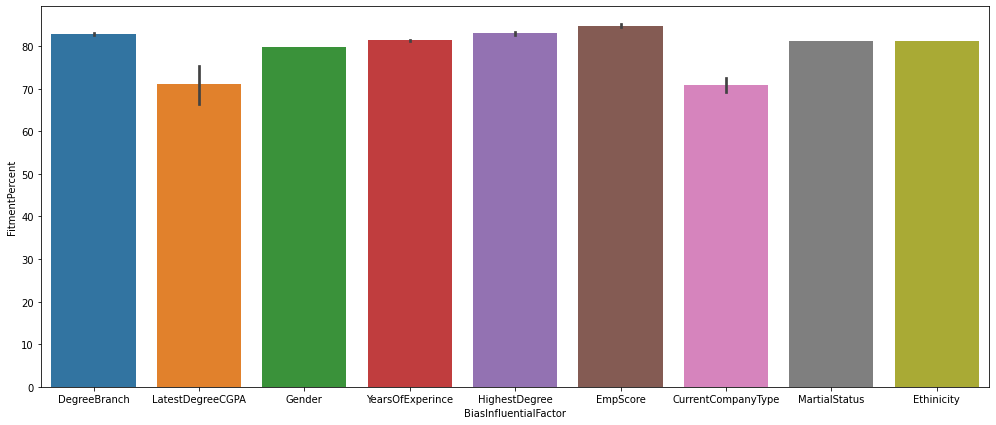

In [66]:
plt.figure(figsize=(17,7))
sns.barplot(x=sub['BiasInfluentialFactor'],y=sub['FitmentPercent'])

### The distribution looks Identical to the distribution for Train set

In [67]:
sub=sub[['EmpID','BiasInfluentialFactor','FitmentPercent']]
sub['FitmentPercent']=sub['FitmentPercent'].apply(lambda x: round(x,2))
sub.to_csv('FinalPredictions.csv',index=False)

In [68]:
sub['BiasInfluentialFactor'].value_counts()

Gender                1948
DegreeBranch          1856
YearsOfExperince      1102
EmpScore               526
HighestDegree          410
CurrentCompanyType     321
MartialStatus          246
LatestDegreeCGPA        30
Ethinicity              10
Name: BiasInfluentialFactor, dtype: int64